In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from wordcloud import WordCloud

In [2]:
# Load data from a JSON file
data = []
with open('Data/reviews.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [3]:
# Convert data into a pandas DataFrame
df=pd.DataFrame(data)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [4]:
# Column names in the DataFrame
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
# Generate descriptive statistics
df.describe(include='all')

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
count,194439,194439,190920,194439,194439,194439.000000,194439,1.944390e+05,194439
unique,27879,10429,24651,1462,194186,NaN,127885,NaN,2830
top,A2NYK9KWFMJV4Y,B005SUHPO6,Amazon Customer,"[0, 0]",,NaN,Great,NaN,"01 2, 2014"
freq,152,837,3562,141310,99,NaN,1218,NaN,450
mean,NaN,NaN,NaN,NaN,NaN,4.129912,NaN,1.368714e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,1.222499,NaN,3.230032e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,9.828000e+08,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1.357603e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.374538e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.390262e+09,NaN


In [6]:
# Shape of the DataFrame
df.shape

(194439, 9)

In [7]:
# Check for missing values in each column
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      3519
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

# Overview of the data

### Columns:
  - `reviewerID`: Unique ID for the reviewer
  - `asin`: Amazon Standard Identification Number, a unique code for the product
  - `reviewerName`: Name of the reviewer
  - `helpful`: Array indicating [number of helpful votes, total votes]
  - `reviewText`: Text of the review
  - `overall`: Rating given by the reviewer
  - `summary`: Short summary of the review
  - `unixReviewTime`: Time of the review in UNIX timestamp format
  - `reviewTime`: Human-readable review time

### Summary Statistics:
- **Data Counts**: 194439 entries
- **Missing Data**: There are 3519 review without reviewer names.
- **Overall Ratings**: Ratings range from 1 to 5, with an average of approximately 4.12.

### Next Steps for Data Wrangling and EDA:
1. **Data Cleaning**:
   - Address missing values where necessary
   - Convert the `helpful` column to a more usable integer column for analysis.
   - Convert `unixReviewTime` to a more readable date format.

2. **Exploratory Data Analysis (EDA)**:
   - Distribution of ratings (`overall`).
   - Trends over time (using `reviewTime`).
   - Text analysis of `reviewText` and `summary` for common themes.
   - Analysis of helpfulness ratings to see how they correlate with review ratings.

In [8]:
# Handle missing values and data type conversions
df['reviewerName'].fillna('Unknown', inplace=True)
df['reviewerName'].isnull().sum()

0

In [9]:
df['helpful'] = df['helpful'].astype(str)
df[['helpful_votes', 'total_votes']] = df['helpful'].str.extract(r'\[(\d+), (\d+)\]')
df[['helpful_votes', 'total_votes']] = df[['helpful_votes', 'total_votes']].fillna(0)
df[['helpful_votes', 'total_votes']] = df[['helpful_votes', 'total_votes']].astype(int)
df['helpfulness_score'] = np.where(df['total_votes'] > 0, 
                                     (df['helpful_votes'] / df['total_votes']) * 100, 
                                     np.nan)
df['helpfulness_score'].head(15)

0            NaN
1            NaN
2            NaN
3     100.000000
4      66.666667
5      50.000000
6            NaN
7      50.000000
8      66.666667
9     100.000000
10           NaN
11     66.666667
12    100.000000
13     75.000000
14    100.000000
Name: helpfulness_score, dtype: float64

In [10]:
df['reviewDate'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df['reviewDate'].head()

0   2014-05-21
1   2014-01-14
2   2014-06-26
3   2013-10-21
4   2013-02-03
Name: reviewDate, dtype: datetime64[ns]

In [11]:
# Clean up DataFrame by dropping unnecessary columns
df.drop(['helpful','helpful_votes','total_votes','unixReviewTime','reviewTime'], axis=1, inplace=True)
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'reviewText', 'overall',
       'summary', 'helpfulness_score', 'reviewDate'],
      dtype='object')

In [12]:
df.head(10)

,reviewerID,asin,reviewerName,reviewText,overall,summary,helpfulness_score,reviewDate
0,A30TL5EWN6DFXT,120401325X,christina,They look good and stick good! I just don't li...,4.0,Looks Good,NaN,2014-05-21
1,ASY55RVNIL0UD,120401325X,emily l.,These stickers work like the review says they ...,5.0,Really great product.,NaN,2014-01-14
2,A2TMXE2AFO7ONB,120401325X,Erica,These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,NaN,2014-06-26
3,AWJ0WZQYMYFQ4,120401325X,JM,Item arrived in great time and was in perfect ...,4.0,Cute!,100.000000,2013-10-21
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,66.666667,2013-02-03
5,APX47D16JOP7H,120401325X,RLH,These make using the home button easy. My daug...,3.0,Cute,50.000000,2013-10-12
6,A1JVVYYO7G56DS,120401325X,Tyler Evans,Came just as described.. It doesn't come unstu...,5.0,best thing ever..,NaN,2013-08-22
7,A6FGO4TBZ3QFZ,3998899561,Abdullah Albyati,it worked for the first week then it only char...,1.0,not a good Idea,50.000000,2013-11-21
8,A2JWEDW5FSVB0F,3998899561,Adam,"Good case, solid build. Protects phone all aro...",5.0,Solid Case,66.666667,2013-09-25
9,A8AJS1DW7L3JJ,3998899561,Agata Majchrzak,This is a fantastic case. Very stylish and pro...,5.0,Perfect Case,100.000000,2014-04-03


In [13]:
# Create a new column 'rating' based on the 'overall' column to classify reviews
df['rating'] = ''  
df.loc[df['overall'] >= 3, 'rating'] = 'Good'
df.loc[df['overall'] <= 3, 'rating'] = 'Bad'
df.loc[df['overall'] == 3, 'rating'] = 'Neutral'

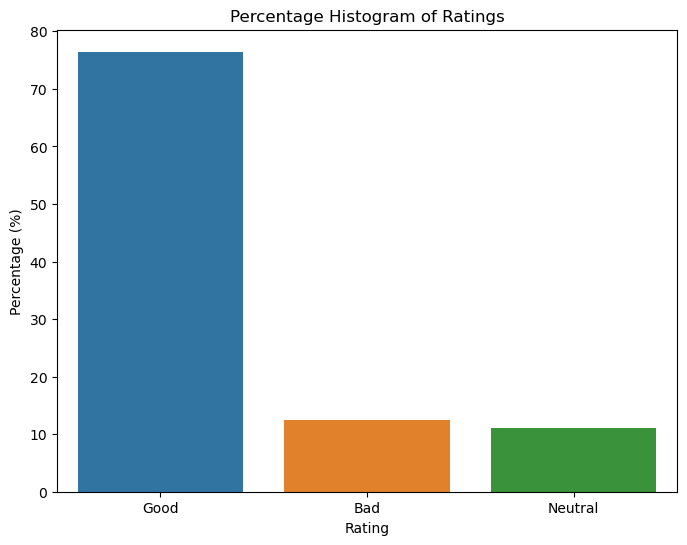

In [14]:
# Calculate and plot the percentage distribution of ratings
rating_counts = df['rating'].value_counts()
rating_percent = (rating_counts / rating_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_percent.index, y=rating_percent.values)
plt.title('Percentage Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage (%)')
plt.show()

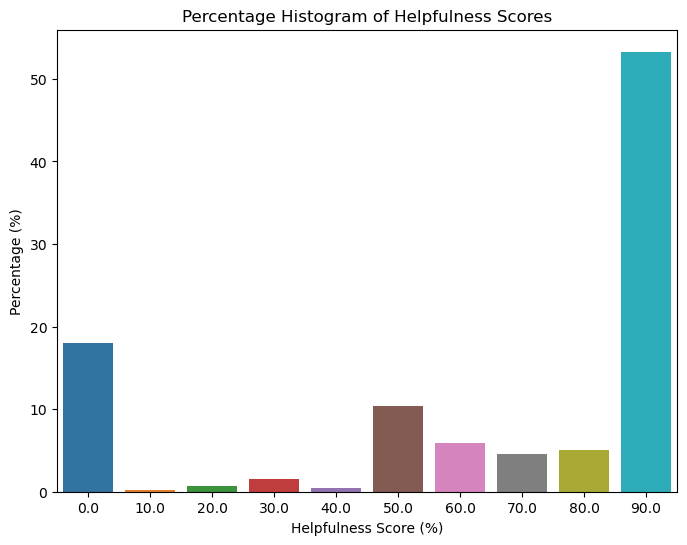

In [15]:
# Analysis of the helpfulness scores
helpfulness_data = df[df['helpfulness_score'].notnull()]['helpfulness_score']
helpfulness_counts, helpfulness_bins = np.histogram(helpfulness_data, bins=10, range=(0,100))
helpfulness_percent = (helpfulness_counts / helpfulness_counts.sum()) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=helpfulness_bins[:-1], y=helpfulness_percent)
plt.title('Percentage Histogram of Helpfulness Scores')
plt.xlabel('Helpfulness Score (%)')
plt.ylabel('Percentage (%)')
plt.show()

### 1. Percentage Histogram of Ratings (Overall)
This graph shows the distribution of ratings given by users on a scale of 1 to 5:

- **High Ratings Dominance:** A significant portion of the ratings are 4s and 5s, with these two categories combined making up a large majority of all ratings. This suggests that users are generally satisfied with the products they are reviewing.
- **Positive Skew:** The distribution of ratings is positively skewed, meaning that there are fewer low ratings (1s and 2s) compared to higher ratings. This could indicate that customers who decide to leave reviews are typically those who have had a positive experience, or it might reflect a generally good quality of products being reviewed.
- **Few Neutral and Negative Ratings:** The relatively low percentages for ratings of 3 (neutral) and particularly 1 and 2 (negative) suggest that negative experiences are less common, or users are less inclined to leave reviews following mediocre or poor experiences.

### 2. Percentage Histogram of Helpfulness Scores
This graph represents how helpful others found the reviews, on a scale from 0% to 100%:

- **High Helpfulness Scores:** There is a significant concentration of scores at 100%, indicating that many reviews are found completely helpful by those who rate them. This might suggest that reviewers are generally doing a good job of providing useful, clear, and thorough information about the products.
- **Distribution Across Scores:** Aside from the peak at 100%, the rest of the scores are distributed across the range, but with notably smaller percentages. This shows that while many reviews are highly valued, there are still a number of reviews that receive mixed evaluations on their helpfulness.
- **Low Helpfulness Less Common:** Lower helpfulness scores are notably less common, which could suggest that negative feedback on review helpfulness is relatively rare, or it could reflect a tendency of users to engage more with content they find useful, ignoring less helpful reviews.

### Overall Insight
Both graphs together give a picture of a community where positive sentiment in product reviews dominates and the reviews are frequently found helpful. This could be beneficial for potential buyers relying on these reviews to make purchasing decisions, as it suggests they are likely to encounter helpful and positive evaluations of products.

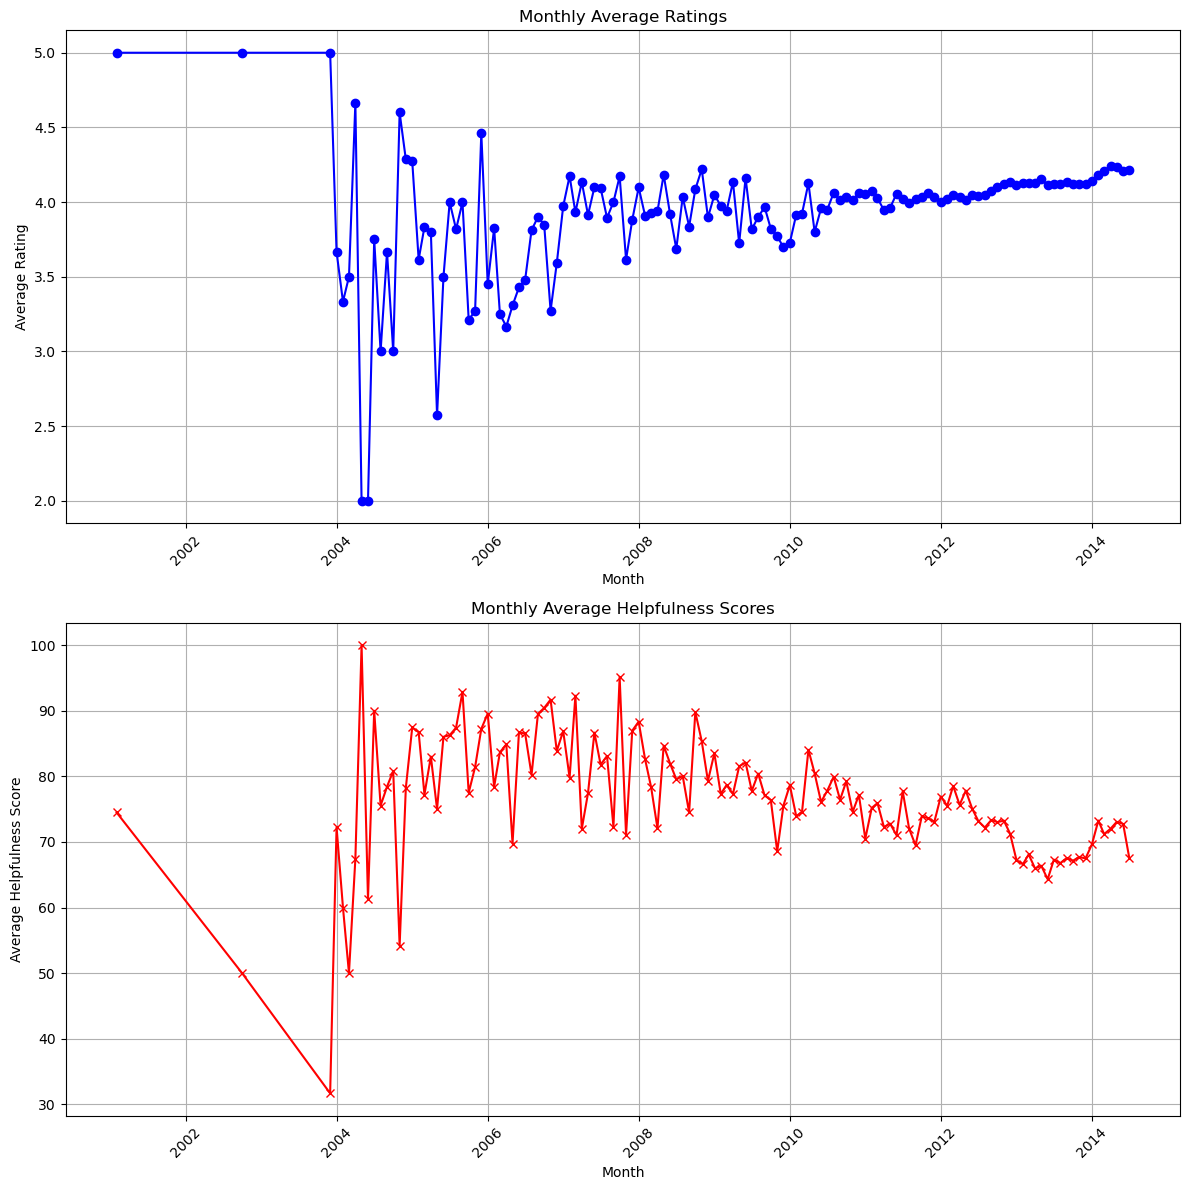

In [16]:
# Calculate and plot monthly averages for ratings and helpfulness scores from review data
monthly_avg_ratings = df.groupby(df['reviewDate'].dt.to_period("M"))['overall'].mean().reset_index()
monthly_avg_helpfulness = df.groupby(df['reviewDate'].dt.to_period("M"))['helpfulness_score'].mean().reset_index()
monthly_avg_ratings.rename(columns={'reviewDate': 'Month', 'overall': 'Average Rating'}, inplace=True)
monthly_avg_helpfulness.rename(columns={'reviewDate': 'Month', 'helpfulness_score': 'Average Helpfulness Score'}, inplace=True)
monthly_avg_ratings['Month'] = monthly_avg_ratings['Month'].dt.to_timestamp()
monthly_avg_helpfulness['Month'] = monthly_avg_helpfulness['Month'].dt.to_timestamp()
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(monthly_avg_ratings['Month'], monthly_avg_ratings['Average Rating'], 'b-o', label='Average Rating')
ax[0].set_title('Monthly Average Ratings')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Average Rating')
ax[0].grid(True)
ax[0].tick_params(axis='x', rotation=45)
ax[1].plot(monthly_avg_helpfulness['Month'], monthly_avg_helpfulness['Average Helpfulness Score'], 'r-x', label='Average Helpfulness Score')
ax[1].set_title('Monthly Average Helpfulness Scores')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Average Helpfulness Score')
ax[1].grid(True)
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Function to clean review text for text analysis
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_reviewText'] = df['reviewText'].astype(str).apply(clean_text)
df['cleaned_summary'] = df['summary'].astype(str).apply(clean_text)

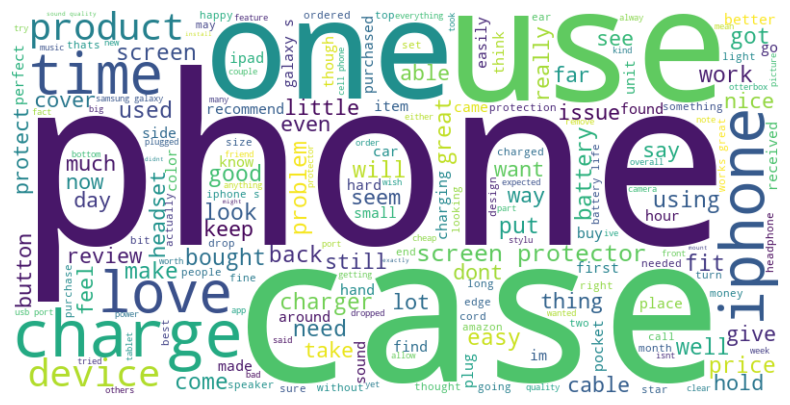

In [18]:
# Apply text cleaning function and generate word clouds
all_reviews = ' '.join(df['cleaned_reviewText'])
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

1. **Positive Sentiment**: Words like "great," "love," "good," and "nice" appear prominently, indicating a generally positive sentiment among the reviews. This suggests that many customers are satisfied with their purchases.

2. **Product Attributes**: Specific terms like "case," "screen," "phone," and "cover" are also visible. This highlights that the reviews are focused on products related to mobile phones or similar devices.

3. **Quality and Functionality**: Words such as "perfect," "easy," and "well" suggest that reviewers often comment on the quality and functionality of the products. They are likely appreciating how well the products meet their needs or how easy they are to use.

4. **Emphasis on Aesthetics**: The presence of words like "cute" and "pretty" implies that aesthetic qualities are significant to reviewers.

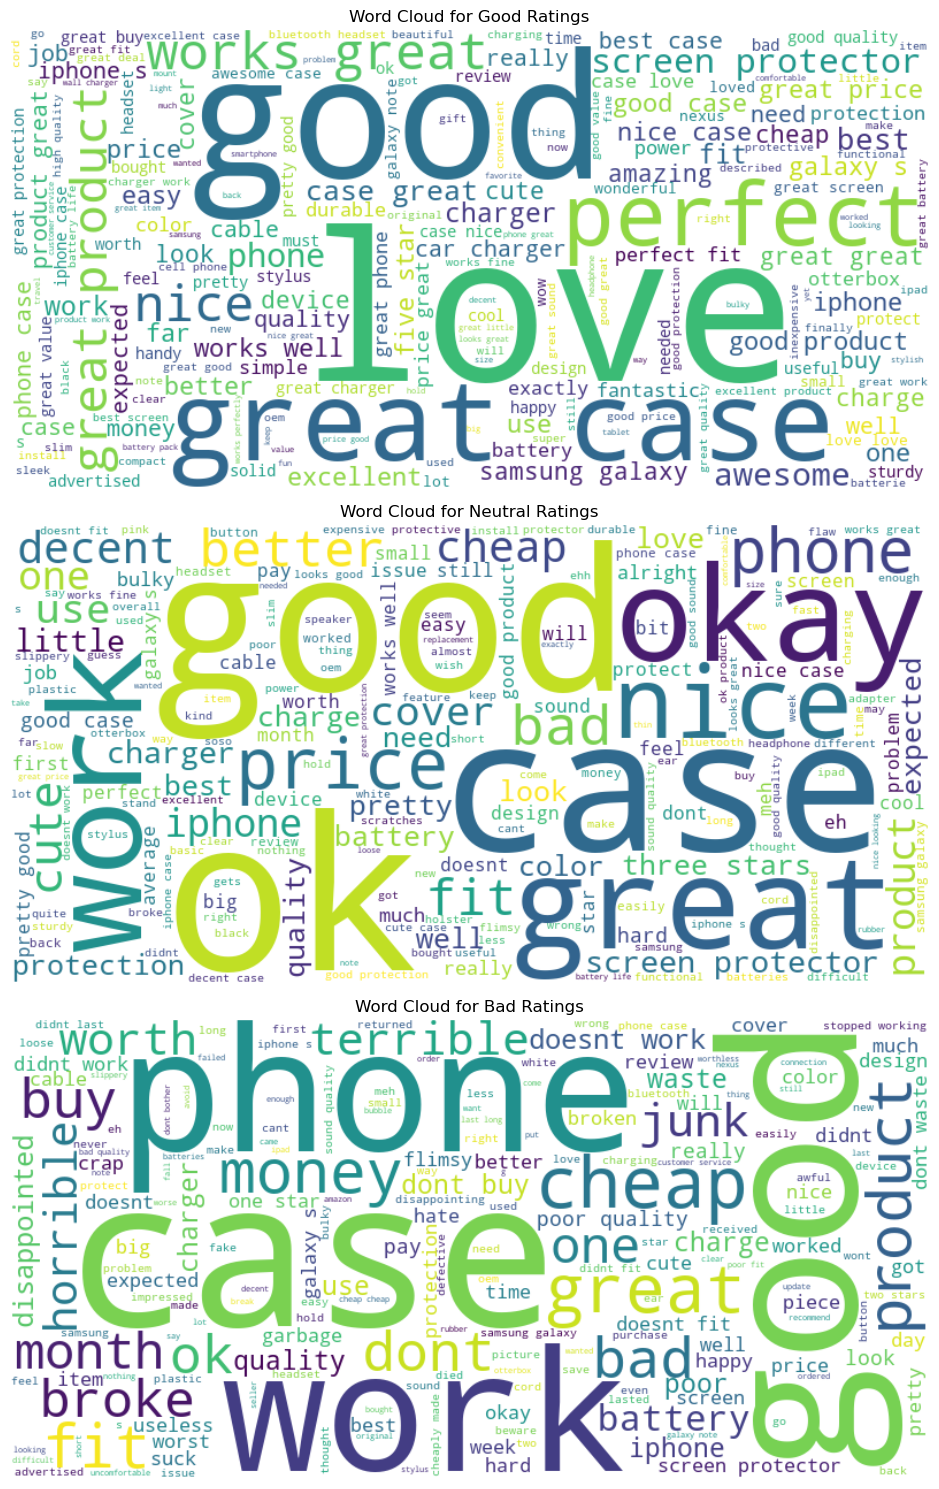

In [19]:
# Generate and display word clouds for each rating category ('Good', 'Neutral', 'Bad') based on review summaries
rating_categories = ['Good', 'Neutral', 'Bad']
fig, axes = plt.subplots(nrows=len(rating_categories), ncols=1, figsize=(10, 15))
for i, category in enumerate(rating_categories):
    specific_summaries = df[df['rating'] == category]['cleaned_summary']
    combined_text = ' '.join(specific_summaries)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f'Word Cloud for {category} Ratings')
plt.tight_layout()
plt.show()